<a href="https://colab.research.google.com/github/kanishk014/Titanic-machine-learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the training dataset

In [ ]:
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

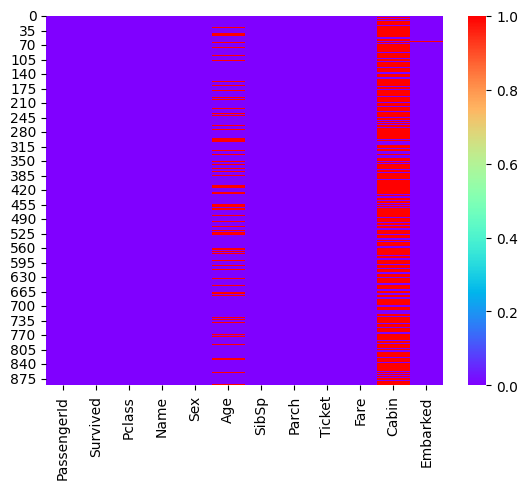

In [ ]:
import seaborn as sns
sns.heatmap(dataset.isnull(), cmap = 'rainbow')

In [ ]:
dataset.drop('Cabin', inplace = True, axis = 1)

In [ ]:
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
dataset['Age'] = dataset['Age'].fillna('30')

In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
dataset.corr()['Survived'].sort_values(ascending = False)

<ipython-input-244-75af9cccf553>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['Survived'].sort_values(ascending = False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

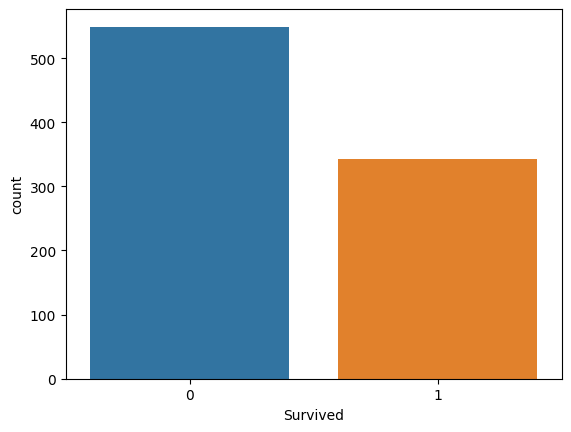

In [ ]:
sns.countplot(data = dataset, x = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

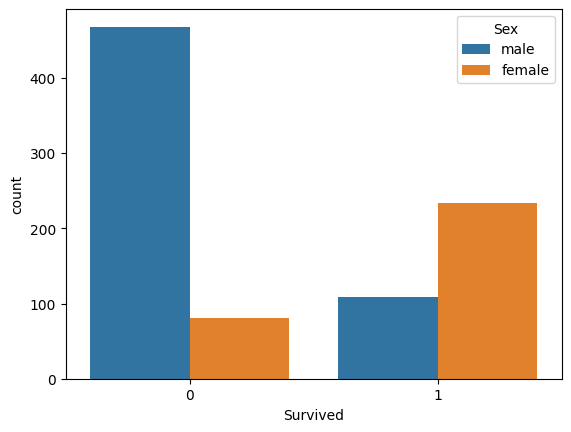

In [ ]:
sns.countplot(data = dataset, x = 'Survived', hue = 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

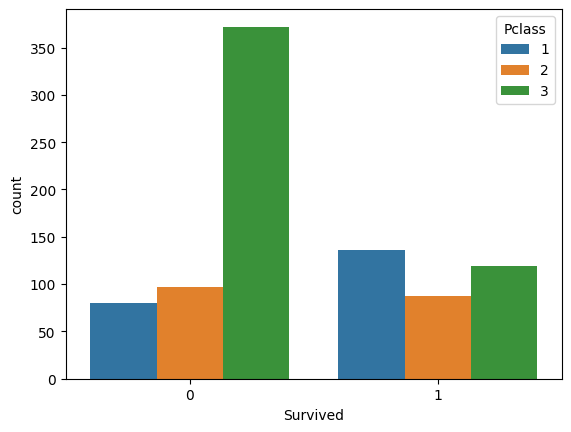

In [ ]:
sns.countplot(data = dataset, x = 'Survived', hue = 'Pclass')

<Axes: xlabel='SibSp', ylabel='count'>

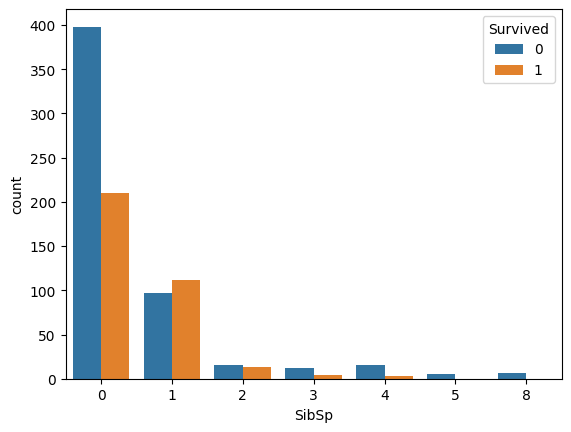

In [ ]:
sns.countplot(data = dataset, x = 'SibSp', hue = 'Survived')

In [ ]:
dataset.drop(['Ticket'], inplace = True, axis = 1)

In [ ]:
dataset.drop(['Embarked'], inplace = True, axis = 1)

In [ ]:
dataset.drop(['Name'], inplace = True, axis = 1)

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [ ]:
dataset.drop(['PassengerId'], inplace = True, axis = 1)

In [ ]:
y = dataset.iloc[:, 0].values

In [ ]:
X = dataset.iloc[:, 1:].values

In [ ]:
print(X)

[[3 1 22.0 1 0 7.25]
 [1 0 38.0 1 0 71.2833]
 [3 0 26.0 0 0 7.925]
 ...
 [3 0 '30' 1 2 23.45]
 [1 1 26.0 0 0 30.0]
 [3 1 32.0 0 0 7.75]]


In [ ]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.83726844 -1.35107247 -0.11257721 -0.46524332 -0.48247365 -0.50388262]
 [-0.35500182  0.74015275  0.35728275 -0.46524332 -0.48247365 -0.40187101]
 [ 0.83726844 -1.35107247  1.06207269  0.39441043  6.64123868  0.27564819]
 ...
 [ 0.83726844  0.74015275  0.04404277 -0.46524332 -0.48247365 -0.50713032]
 [ 0.83726844 -1.35107247  0.51390273  0.39441043 -0.48247365 -0.31393342]
 [-0.35500182  0.74015275  2.39334258  0.39441043  0.70481174  0.11776023]]


In [ ]:
print(X_test)

[[ 0.83726844  0.74015275  0.04404277 -0.46524332 -0.48247365 -0.3727257 ]
 [ 0.83726844  0.74015275  0.04404277 -0.46524332 -0.48247365 -0.51079372]
 [ 0.83726844  0.74015275 -1.75708708  2.97337169  0.70481174 -0.07959971]
 ...
 [-0.35500182 -1.35107247 -0.19088721  0.39441043 -0.48247365 -0.38471719]
 [ 0.83726844  0.74015275  0.27897275 -0.46524332 -0.48247365 -0.50388262]
 [-0.35500182 -1.35107247 -1.99201706  1.25406418  0.70481174  0.11776023]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[194  27]
 [ 46  90]]


0.7955182072829131

#Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth = 15)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[196  25]
 [ 42  94]]


0.8123249299719888

# Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_KNN = classifier_KNN.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
accuracy_score(y_test, y_pred_KNN)

[[198  23]
 [ 48  88]]


0.8011204481792717

# Test Data

In [ ]:
test_dataset = pd.read_csv('test.csv')
passengerId = test_dataset['PassengerId']
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_dataset['Embarked'] = test_dataset['Embarked'].fillna('S')

In [ ]:
test_dataset['Age'] = test_dataset['Age'].fillna('30')

In [ ]:
test_dataset.drop(['Ticket', 'Embarked', 'Name'], inplace = True, axis = 1)

In [ ]:
test_dataset.drop('Cabin', inplace = True, axis = 1)

In [ ]:
test_dataset.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [ ]:
test_dataset.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_dataset['Sex'] = le.fit_transform(test_dataset['Sex'])

In [ ]:
test_dataset['Fare'] = test_dataset['Fare'].fillna(test_dataset['Fare'].mean())

In [ ]:
test_dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [ ]:
test_dataset.drop('PassengerId', inplace = True, axis = 1)

In [ ]:
X_2 = test_dataset.iloc[:, 0:].values

from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler()
X_2 = sc_test.fit_transform(X_2)

In [ ]:
print(X_2)

[[ 0.87348191  0.75592895  0.33942386 -0.49947002 -0.4002477  -0.49840706]
 [ 0.87348191 -1.32287566  1.32992353  0.61699237 -0.4002477  -0.51327429]
 [-0.31581919  0.75592895  2.51852314 -0.49947002 -0.4002477  -0.46508846]
 ...
 [ 0.87348191  0.75592895  0.65638375 -0.49947002 -0.4002477  -0.50879189]
 [ 0.87348191  0.75592895 -0.01715602 -0.49947002 -0.4002477  -0.4944482 ]
 [ 0.87348191  0.75592895 -0.01715602  0.61699237  0.61989583 -0.23790598]]


In [ ]:
y_pred_test = classifier.predict(X_2)

In [ ]:
print(y_pred_test)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]


In [ ]:
test_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,30,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,30,0,0,8.0500


In [ ]:
to_append = pd.DataFrame(y_pred_test, columns = ['Survived'])

In [ ]:
to_append

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
print(y_pred_test)

     Survived
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
..        ...
413       NaN
414       NaN
415       NaN
416       NaN
417       NaN

[418 rows x 1 columns]


In [ ]:
y_pred_test.count()

0    418
dtype: int64

In [ ]:
answer = pd.concat([passengerId, to_append] ,axis= 1)
print(answer)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
answer.to_csv("submission.csv",index=False)